# Anthropic's claude 3.5 sonnet model
In this notebook we will test claude 3.5 sonnet and also its vision capabilities.

In [1]:
from bia_bob import bob
bob.initialize(model="claude-3-opus-20240229", vision_model="claude-3-opus-20240229")

First, we load an example image.

In [2]:
%bob load "hela-cells-8bit.tif" and store it in the variable `image`. Also show the image

I will load the image "hela-cells-8bit.tif", store it in the variable `image`, and display the image.



StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
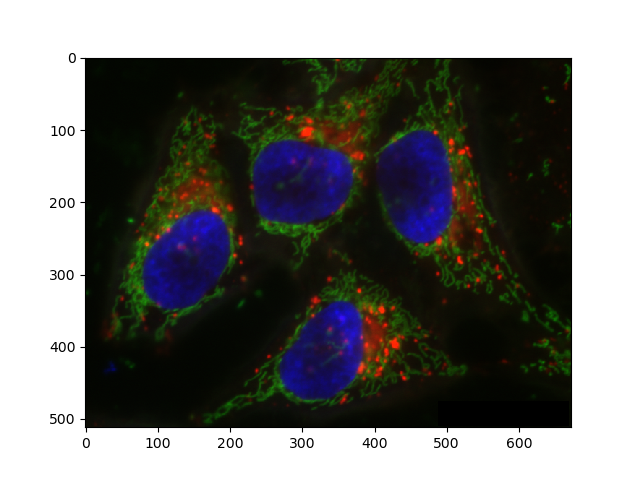
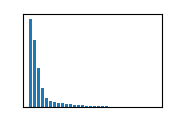

In [3]:
from skimage.io import imread
import stackview

image = imread("hela-cells-8bit.tif")

stackview.insight(image)

The model has vision capabilities.

In [4]:
%%bob image
what's in this microscopy image? Answer in one short sentence.

The image shows multiple stained cells, likely cancer cells such as HeLa cells, on a dark background.

This serves as as sanity check if the information about the image content has been stored in memory.

In [5]:
%bob what's again in this image ?

The image shows multiple stained cells, likely cancer cells such as HeLa cells, on a dark background.

In [6]:
%bob how could I segment the nuclei ?

To segment the nuclei in the provided image of stained cells, I will perform a series of image processing steps to isolate the nuclei from the background and other cellular structures. This will involve thresholding, cleaning up the binary mask, and applying connected component analysis to generate labeled nuclei.



In [9]:
from skimage.io import imread
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects, remove_small_holes
from skimage.segmentation import clear_border
from skimage.measure import label

# Load the image
#image = imread('nuclei_image.png') # modified by human

# Apply Gaussian blur
blurred = gaussian(image[...,2], sigma=2) # modified by human

# Threshold using Otsu's method
from skimage.filters import threshold_otsu
threshold = threshold_otsu(blurred)
binary = blurred > threshold

# Clean up the binary mask
binary = remove_small_objects(binary, min_size=100)
binary = remove_small_holes(binary, area_threshold=100)
binary = clear_border(binary)

# Label the nuclei
labels = label(binary)

# Display the results
import stackview
stackview.curtain(image, labels)